# Binary Alpha Digits Study
## Get the libraries

In [1]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
from principal_RBM_alpha import RBM
from principal_DBN_alpha import DBN

## Get the data

In [2]:
def lire_alpha_digit(indexes):
    mat = scipy.io.loadmat("binaryalphadigs.mat")
    new_mat = mat['dat'][indexes]
    new_mat = new_mat.reshape(new_mat.shape[0] * new_mat.shape[1])

    new_new_mat = np.zeros((new_mat.shape[0], new_mat[0].shape[0] * new_mat[0].shape[1]))
    for i in range(len(new_mat)):
        new_new_mat[i] = new_mat[i].reshape(new_mat[i].shape[0] * new_mat[i].shape[1])
        
    return new_new_mat

In [3]:
LIST_IDX_DATA = [5, 12, 21]
data = lire_alpha_digit(LIST_IDX_DATA)

In [4]:
def afficher_alpha_digit(data, row, col):
    indexes = [np.random.randint(0, data.shape[0]) for idx in range(row*col)]
    
    fig, axes = plt.subplots(row, col, figsize=(10,7))
    for i, idx in enumerate(indexes):
        ax = axes[i // col, i % col]
        ax.imshow(data[idx].reshape(20,16), cmap='gray')
        ax.set_xticks([])
        ax.set_yticks([])
        ax.set_title(f'sample{idx}')
        
    fig.subplots_adjust(wspace=0, hspace=0) 
    fig.tight_layout()
    plt.show()
    

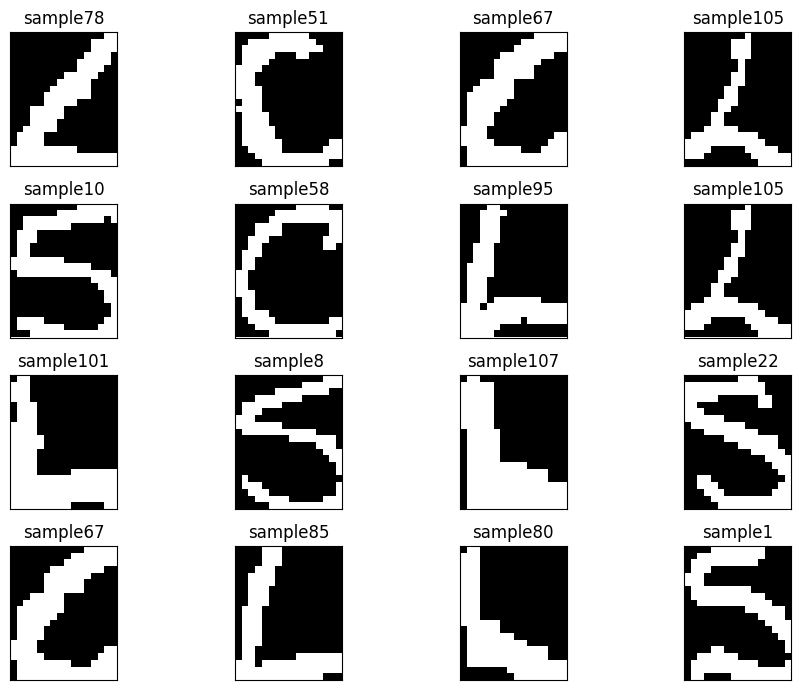

In [5]:
afficher_alpha_digit(data, 4, 4)

## Create RBM

After loading the data, we specify the parameters related to the network and to learning: size of the neural network (vector containing the number of neurons), number of iterations, learning rate and size of the mini-batch.


In [6]:
p = 320 #number of visible neurones
q = 150 #number of hidden neurones
EPSILON = 0.01 #learning rate
BATCH_SIZE = 32 #size of the mini-batch
NB_EPOCHS = 300 #number of iterations for gradient descents

First, an RBM is trained unsupervised and then it is checked that the trained RBM is able to generate data with a structure similar to the training data.

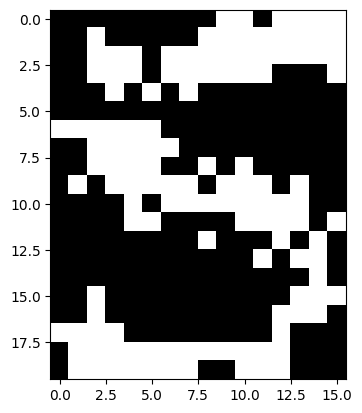

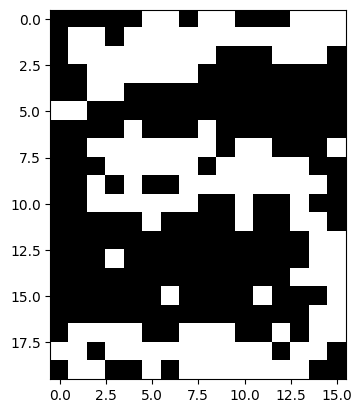

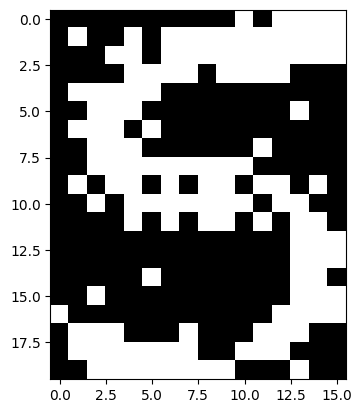

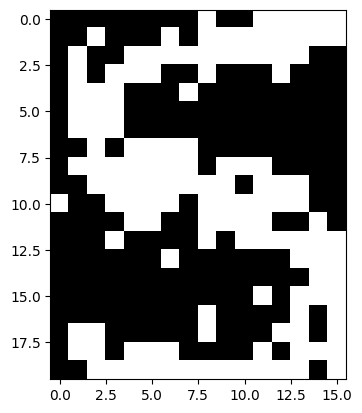

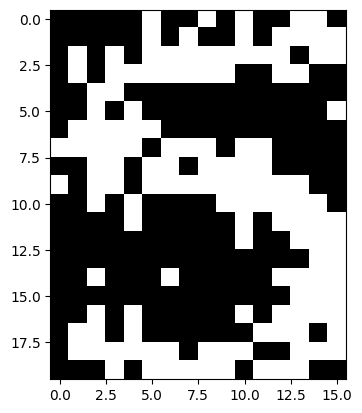

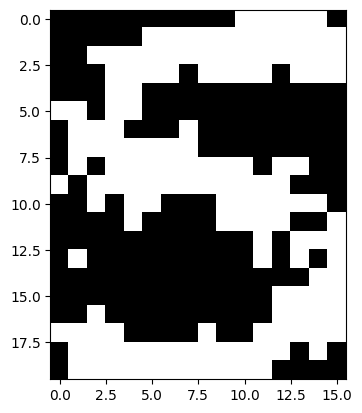

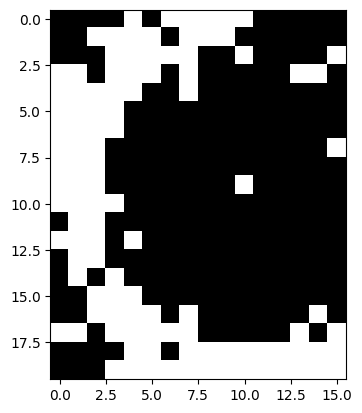

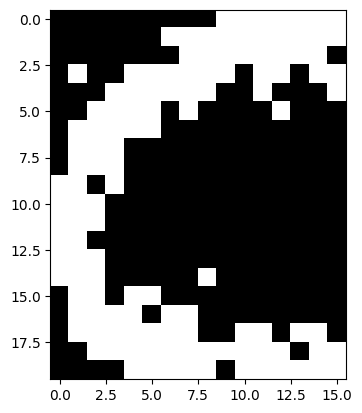

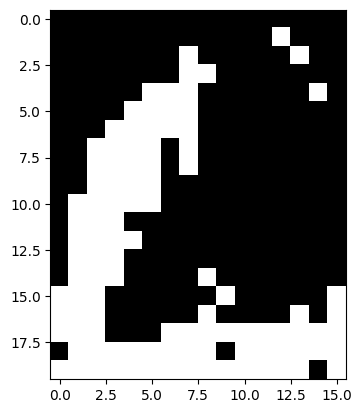

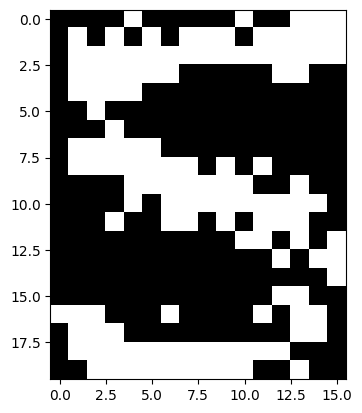

In [7]:
# Create the model
rbm_model = RBM(p=p, q=q)

# Train the model
rbm_model.train_RBM(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)

# Generate only images from RBM
rbm_model.generer_image_RBM(nb_data=10, nb_gibbs=100)

Epoch0/300


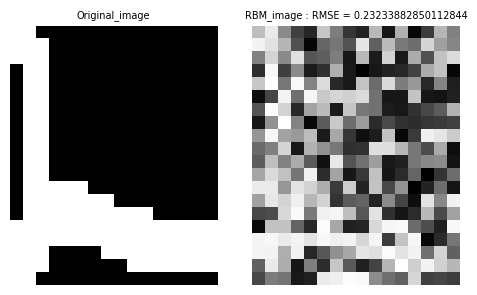

Epoch20/300


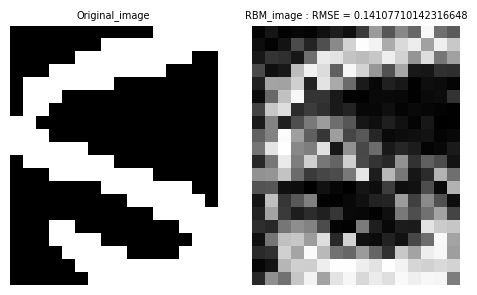

Epoch40/300


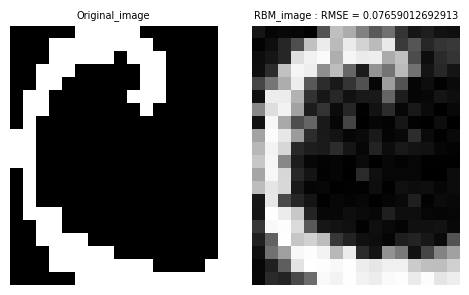

Epoch60/300


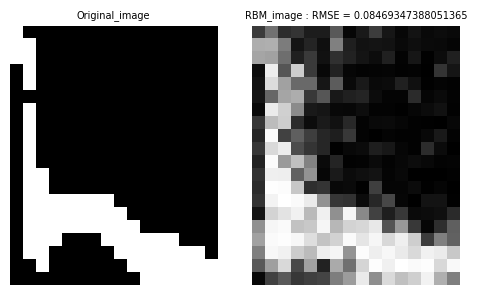

Epoch80/300


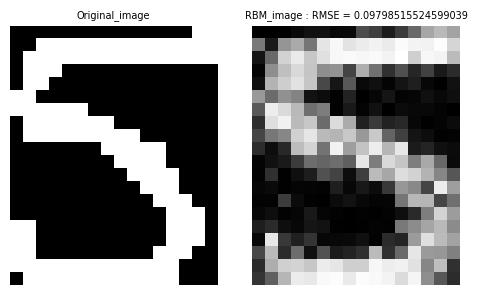

Epoch100/300


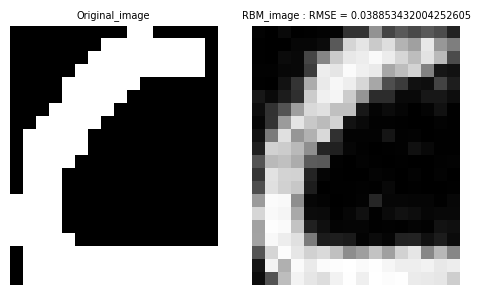

Epoch120/300


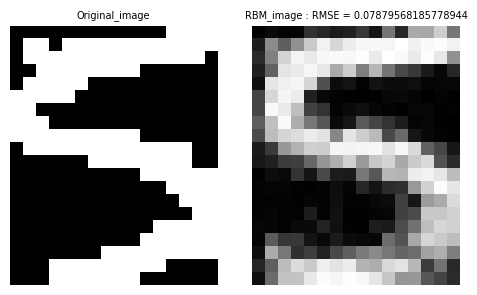

Epoch140/300


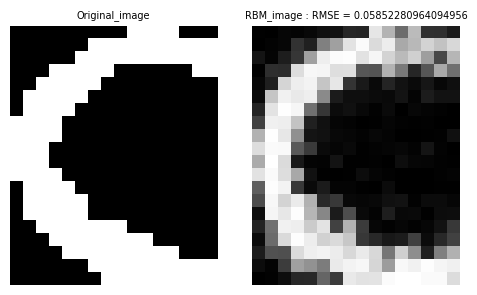

Epoch160/300


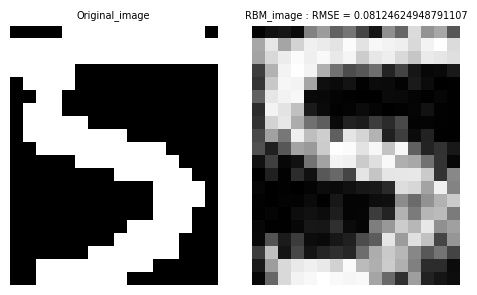

Epoch180/300


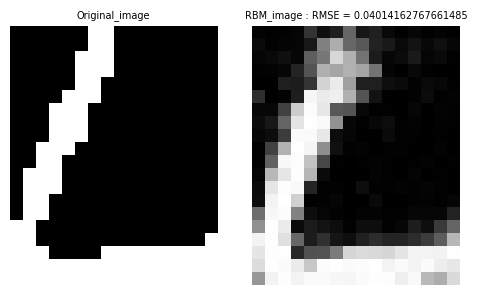

Epoch200/300


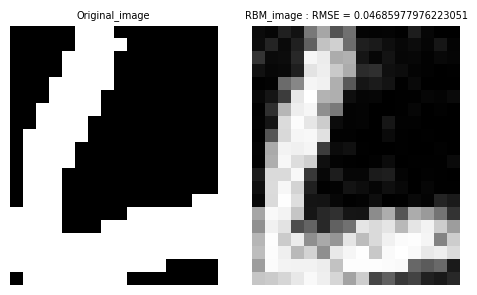

Epoch220/300


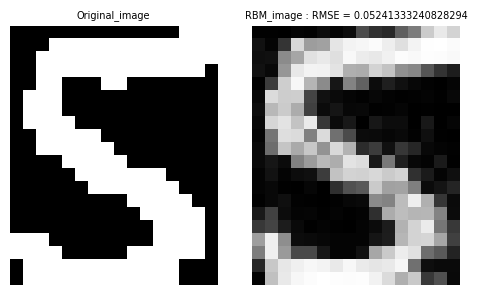

Epoch240/300


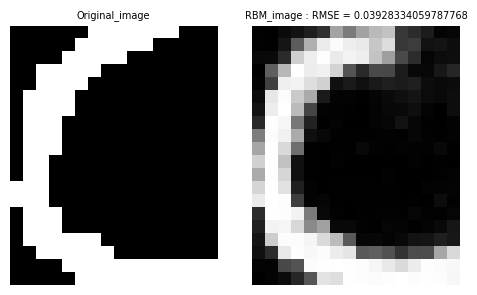

Epoch260/300


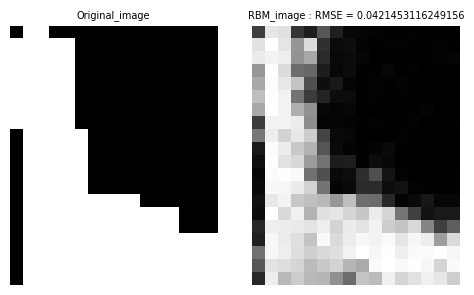

Epoch280/300


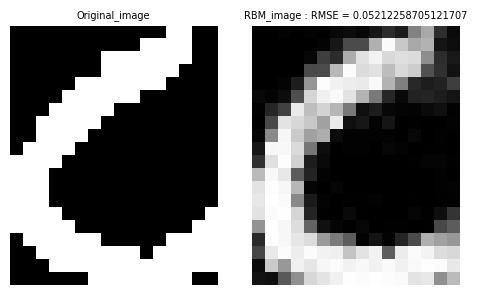

In [8]:
rbm_model.display_image_RBM_vs_original()

### See the weights matrix W 

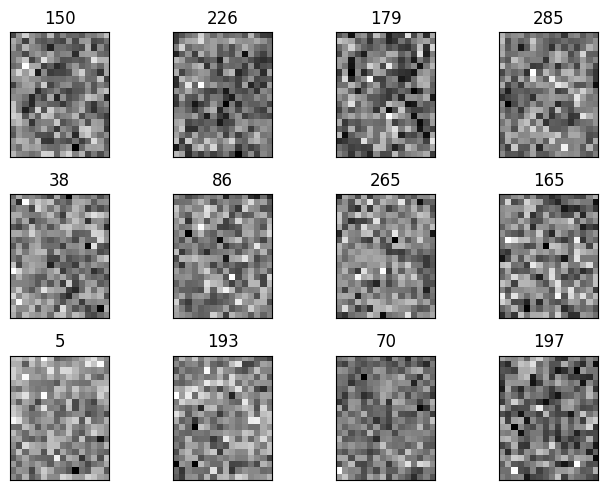

In [9]:
rbm_model = RBM(p, q=512)
rbm_model.train_RBM(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
rbm_model.features_extracted(3, 4)

### Study the RMSE as the epoch increases

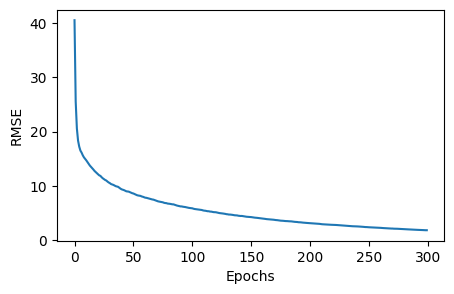

In [10]:
rbm = RBM(p, q=512)
errors_all = rbm.train_RBM(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
plt.figure(figsize=(5, 3))
plt.plot(errors_all)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

### Vary the values of learning rate / epsilon

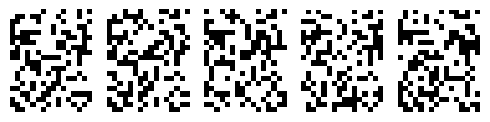

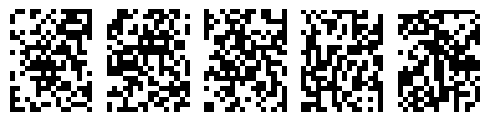

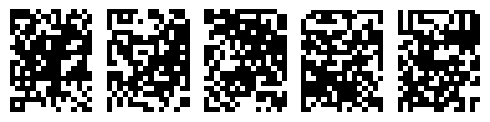

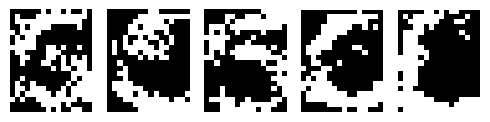

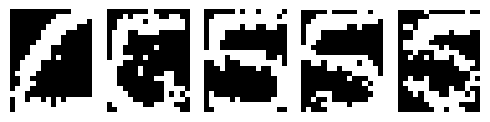

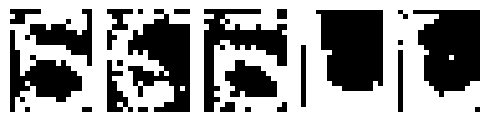

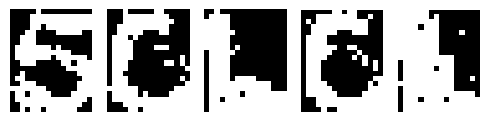

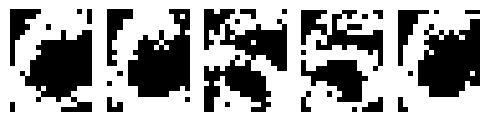

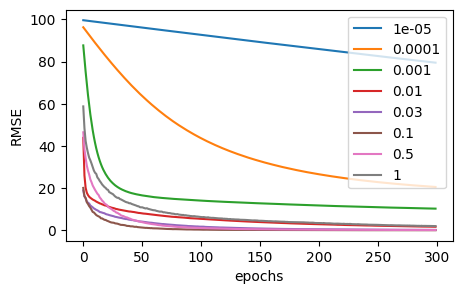

In [12]:
# Test different values of learning rate / epsilon:
# each subplot correspond to a value of epsilon
epsilons = [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.5, 1]
errors_eps = []
for eps in epsilons:
    rbm = RBM(p, q=512)
    errors_all_eps = rbm.train_RBM(X=data, epsilon=eps, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_eps.append(errors_all_eps)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, eps in enumerate(errors_eps):
    plt.plot(eps, label=epsilons[i])
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Vary the values of nb_epochs

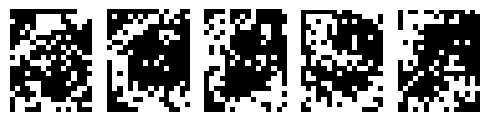

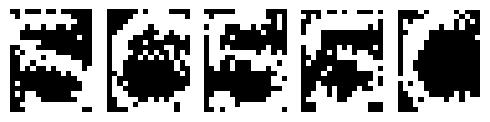

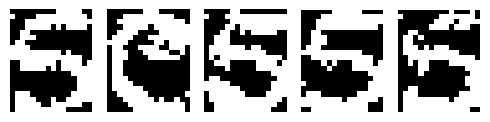

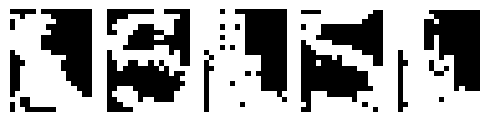

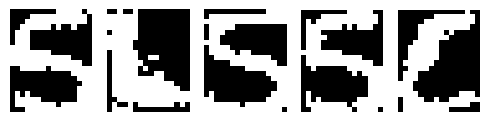

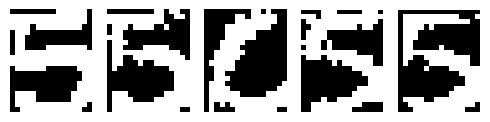

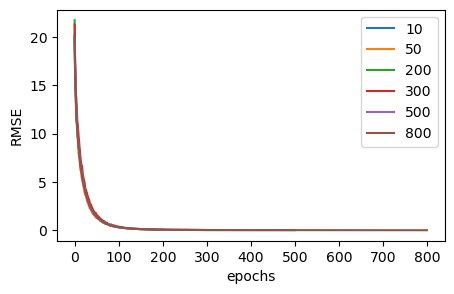

In [12]:
# Test different values of nb_epochs
# each subplot correspond to a value of nb_epochs
nb_epochs = [10, 50, 200, 300, 500, 800]
errors_epochs = []
for epoch in nb_epochs:
    rbm = RBM(p, q=512)
    errors_all_epoch = rbm.train_RBM(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=epoch)
    errors_epochs.append(errors_all_epoch)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, eps in enumerate(errors_epochs):
    plt.plot(eps, label=nb_epochs[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Vary the batch_size

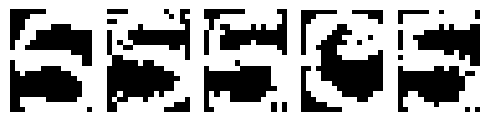

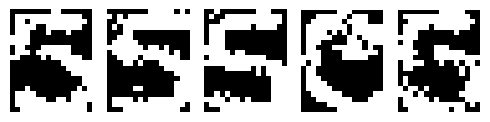

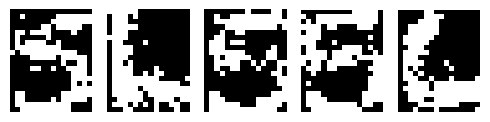

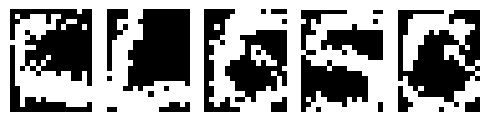

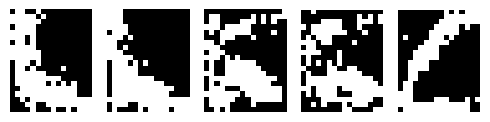

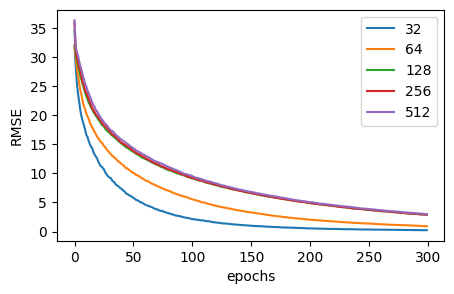

In [14]:
# Test different values of batch_size

batch_size = [32, 64, 128, 256, 512]
errors_batchsize = []
for bs in batch_size:
    rbm = RBM(p=320, q=256)
    errors_all_batchsize = rbm.train_RBM(X=data, epsilon=0.1, batch_size=bs, nb_epochs=300)
    errors_batchsize.append(errors_all_batchsize)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, bs in enumerate(errors_batchsize):
    plt.plot(bs, label=batch_size[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

As we can see, in our case, the larger the batch size, the slower the convergence.

### Vary the values of q

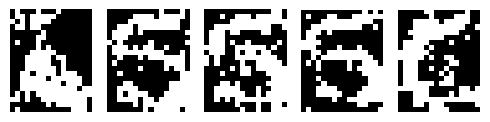

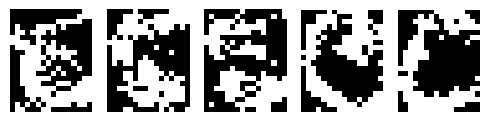

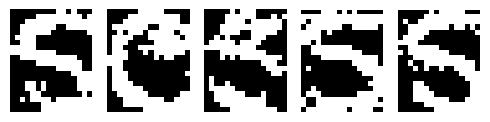

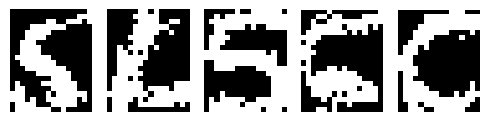

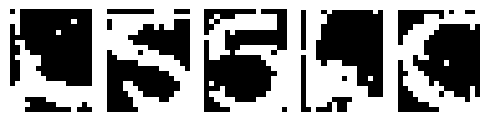

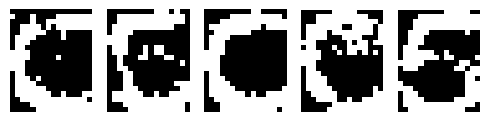

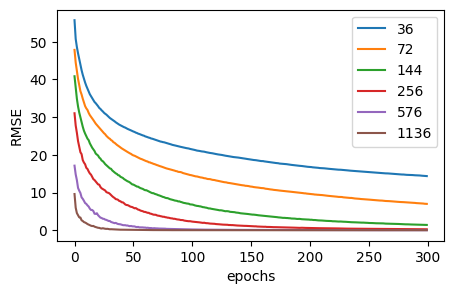

In [16]:
# Test different values of q (hidden neurones capable of capturing or extracting the features)
# each subplot correspond to a value of q

q_values = [36, 72, 144, 256, 576, 1136]
errors_qvalues = []
for qvalue in q_values:
    rbm = RBM(p, q=qvalue)
    errors_all_qvalues = rbm.train_RBM(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_qvalues.append(errors_all_qvalues)
    rbm.generate_for_analysis(nb_gibbs=10, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, qvalue in enumerate(errors_qvalues):
    plt.plot(qvalue, label=q_values[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

## Create DBN

In [17]:
CONFIG = [320, 100, 50, 100]
EPSILON = 0.01
BATCH_SIZE = 32
NB_EPOCHS = 100

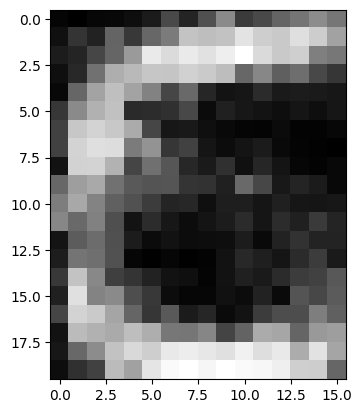

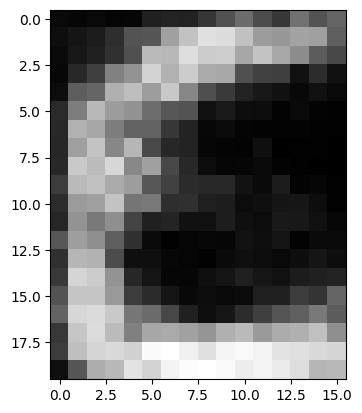

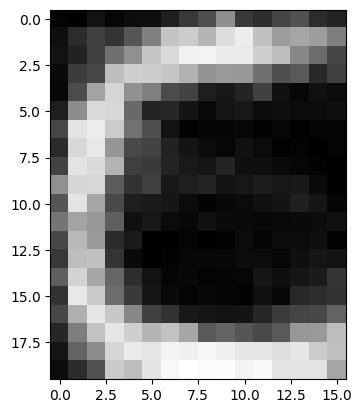

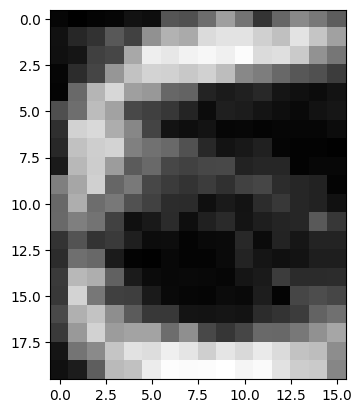

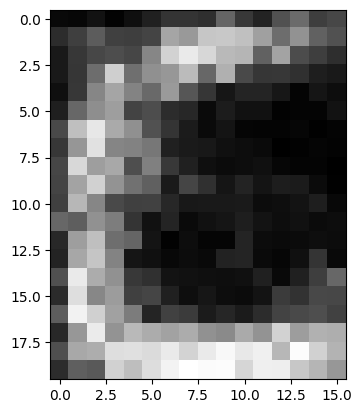

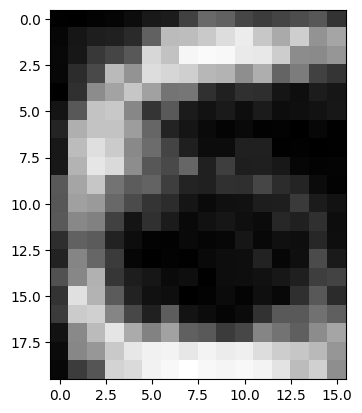

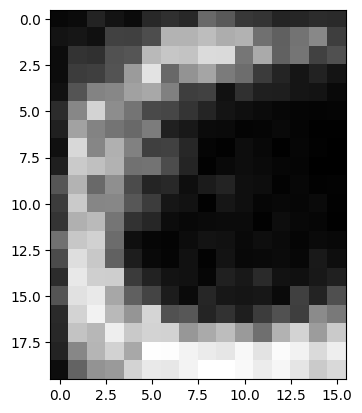

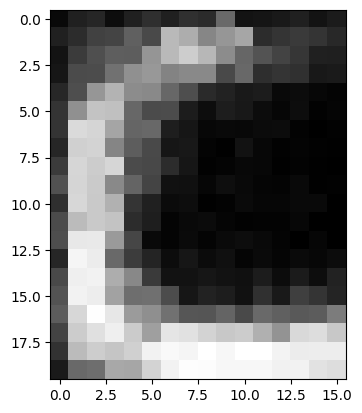

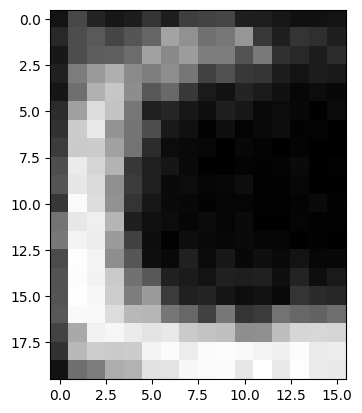

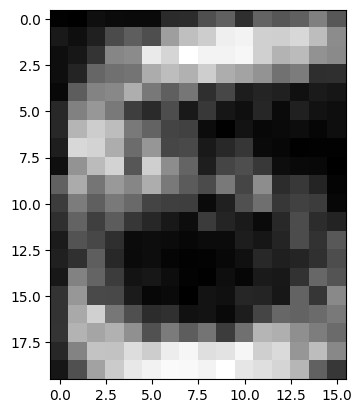

In [18]:
# Create the model
dbn_model = DBN(config=CONFIG)

# Train the model
dbn_model.train_DBN(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)

# Generate images from DBN
dbn_model.generer_image_DBN(nb_data=10, nb_gibbs=100)
#dbn_model.display_image_DBN_vs_original()

Epoch0/100


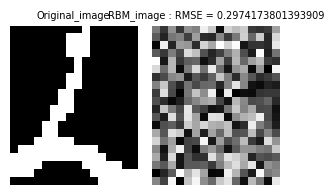

Epoch20/100


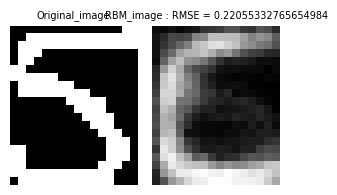

Epoch40/100


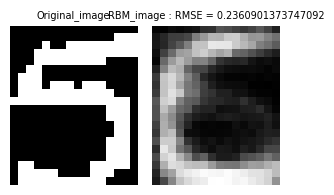

Epoch60/100


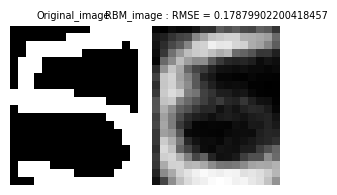

Epoch80/100


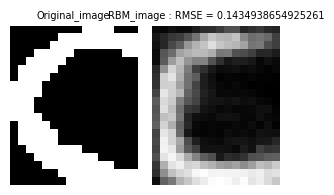

In [19]:
dbn_model.display_image_DBN_vs_original()

### Study the RMSE as the epoch increases

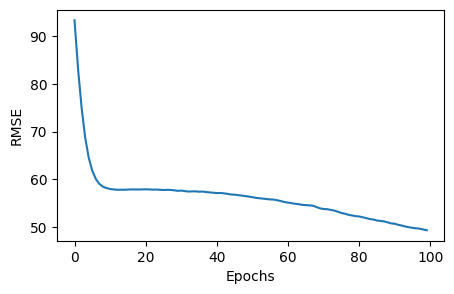

In [20]:
dbn_model = DBN(config=CONFIG)
errors_all = dbn_model.train_DBN(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
plt.figure(figsize=(5, 3))
plt.plot(errors_all)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()

### Vary the values of learning rate / epsilon

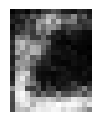

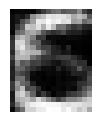

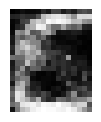

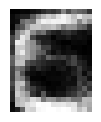

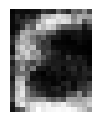

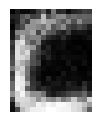

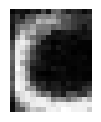

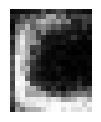

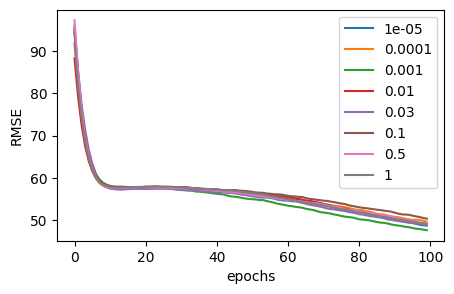

In [23]:
# Test different values of learning rate / epsilon
epsilons = [0.00001, 0.0001, 0.001, 0.01, 0.03, 0.1, 0.5, 1]
errors_eps = []
for eps in epsilons:
    dbn_model = DBN(config=CONFIG)
    errors_all_eps = dbn_model.train_DBN(X=data, epsilon=EPSILON, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
    errors_eps.append(errors_all_eps)
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, eps in enumerate(errors_eps):
    plt.plot(eps, label=epsilons[i])
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Vary the values of nb_epochs

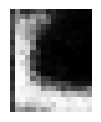

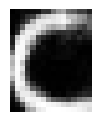

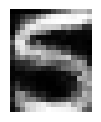

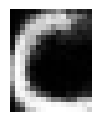

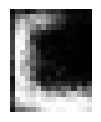

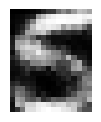

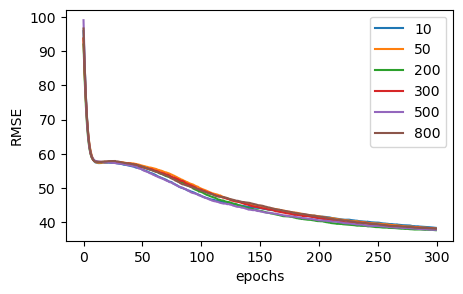

In [20]:
# Test different values of nb_epochs

nb_epochs = [10, 50, 200, 300, 500, 800]
errors_epochs = []
for epoch in nb_epochs:
    dbn_model = DBN(config=CONFIG)
    errors_all_epoch = dbn_model.train_DBN(X=data, epsilon=0.01, batch_size=BATCH_SIZE, nb_epochs=NB_EPOCHS)
    errors_epochs.append(errors_all_epoch)
    dbn_model.generate_for_analysis_DBN(nb_gibbs=10, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, eps in enumerate(errors_epochs):
    plt.plot(eps, label=nb_epochs[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Vary the batch_size

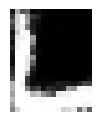

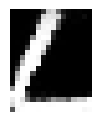

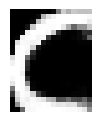

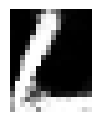

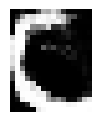

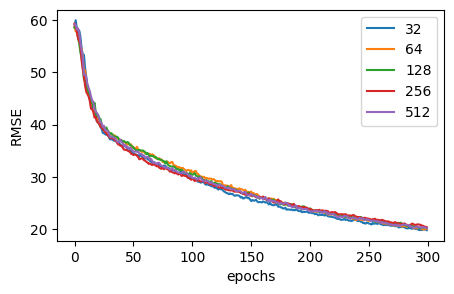

In [24]:
# Test different values of batch_size

batch_size = [32, 64, 128, 256, 512]
q_values = CONFIG

errors_batchsize = []
for bs in batch_size:
    dbn_model = DBN(config=CONFIG)
    errors_all_batchsize = dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_batchsize.append(errors_all_batchsize)
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, bs in enumerate(errors_batchsize):
    plt.plot(bs, label=batch_size[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()



### Vary the q values and see the impact of the depth of the neural network

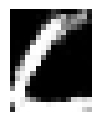

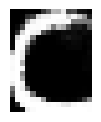

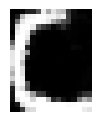

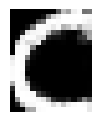

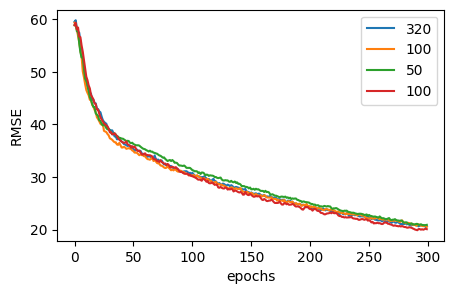

In [25]:
# Test different values of q (hidden neurones capable of capturing or extracting the features)

q_values = CONFIG

errors_qvalues = []
for qvalue in q_values:
    dbn_model = DBN(config=CONFIG)
    errors_all_qvalues = dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_qvalues.append(errors_all_qvalues)
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, qvalue in enumerate(errors_qvalues):
    plt.plot(qvalue, label=q_values[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

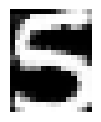

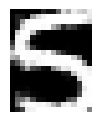

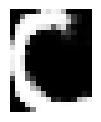

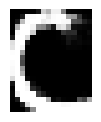

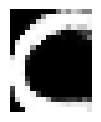

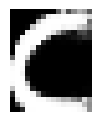

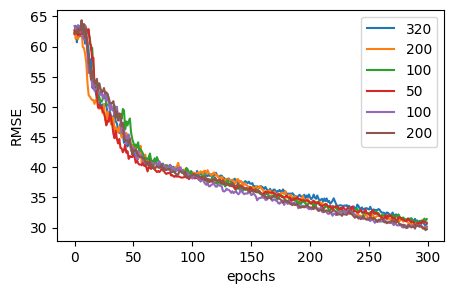

In [26]:
# Test different values of q (hidden neurones capable of capturing or extracting the features)

q_values = [320, 200, 100, 50, 100, 200]

errors_qvalues = []
for qvalue in q_values:
    dbn_model = DBN(config=q_values)
    errors_all_qvalues = dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_qvalues.append(errors_all_qvalues)
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, qvalue in enumerate(errors_qvalues):
    plt.plot(qvalue, label=q_values[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

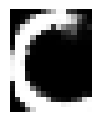

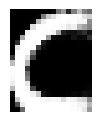

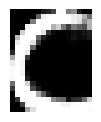

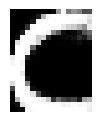

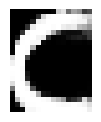

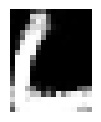

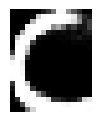

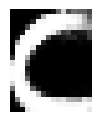

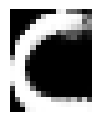

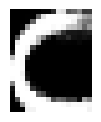

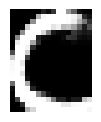

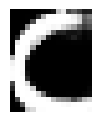

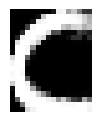

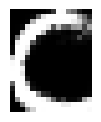

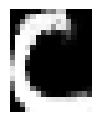

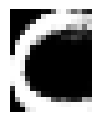

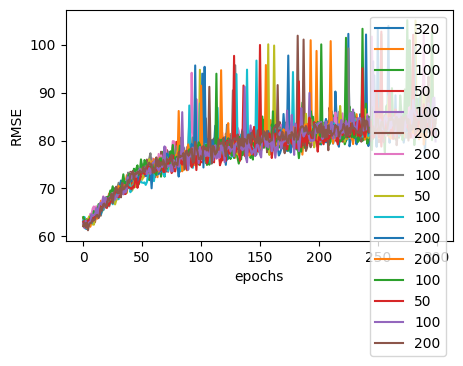

In [27]:
# Test different values of q (hidden neurones capable of capturing or extracting the features)

q_values = [320, 200, 100, 50, 100, 200, 200, 100, 50, 100, 200, 200, 100, 50, 100, 200]

errors_qvalues = []
for qvalue in q_values:
    dbn_model = DBN(config=q_values)
    errors_all_qvalues = dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=BATCH_SIZE, nb_epochs=300)
    errors_qvalues.append(errors_all_qvalues)
    dbn_model.generate_for_analysis_DBN(nb_gibbs=100, col=5, row=1)

fig, ax = plt.subplots(1, 1, figsize = (5, 3))
for i, qvalue in enumerate(errors_qvalues):
    plt.plot(qvalue, label=q_values[i])
    
plt.xlabel('epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

### Evaluate the capacity of the DBN to learn more characters

In [28]:
CONFIG = [320, 100, 50, 100]
EPSILON = 0.1
BATCH_SIZE = 70
NB_EPOCHS = 300

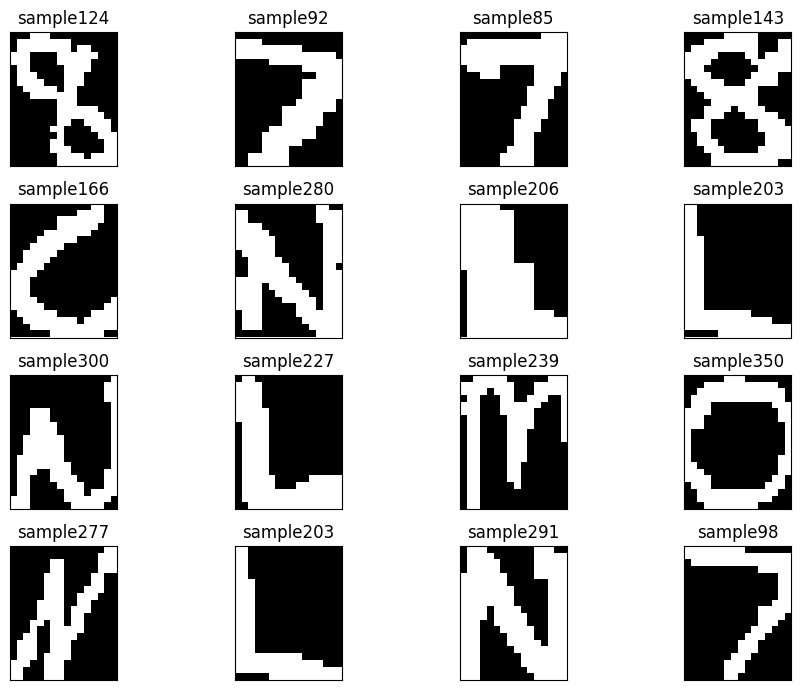

In [29]:
LIST_IDX_DATA = [5, 6, 7, 8, 12, 21, 22, 23, 24]
data = lire_alpha_digit(LIST_IDX_DATA)
afficher_alpha_digit(data, 4, 4)

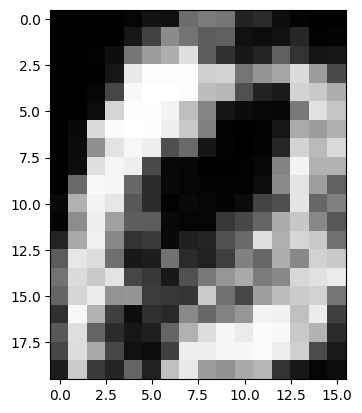

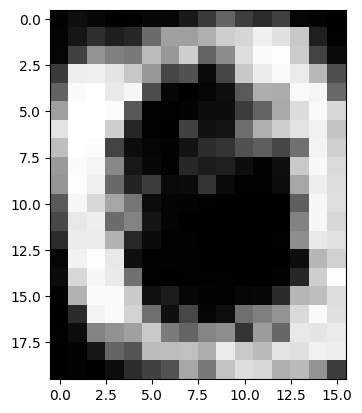

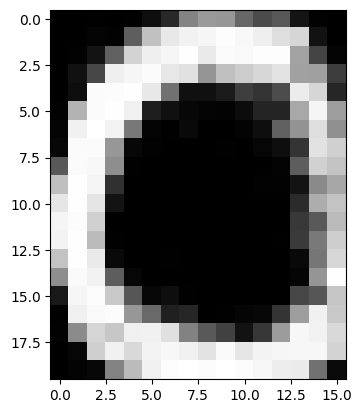

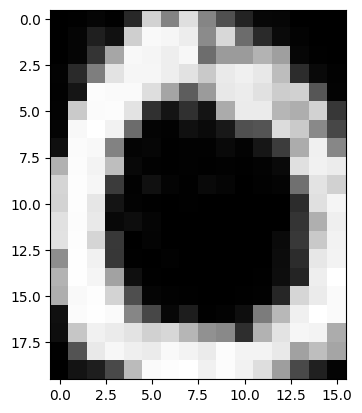

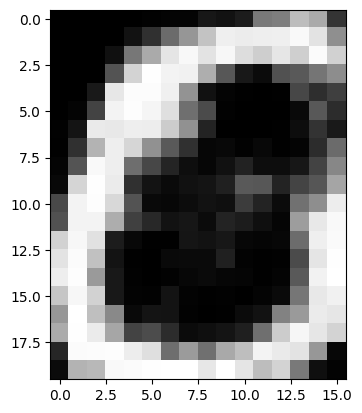

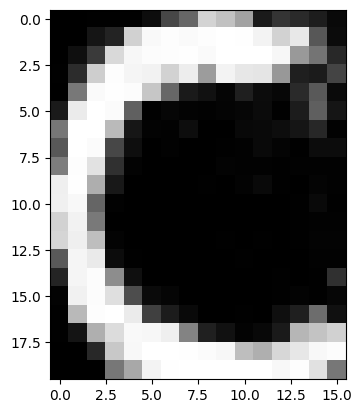

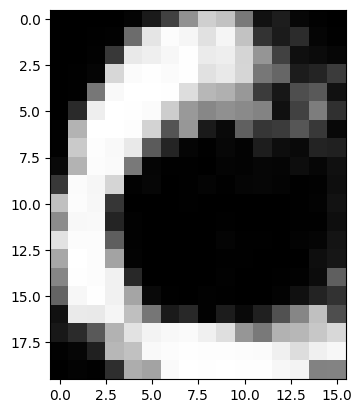

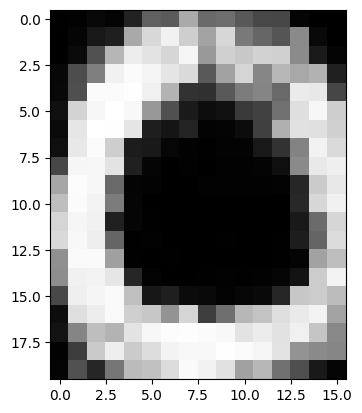

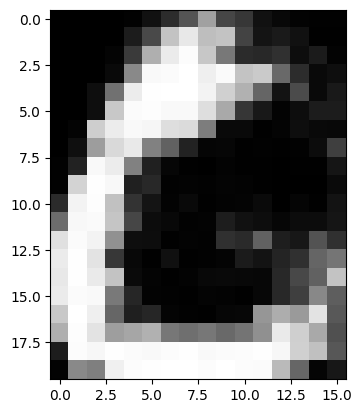

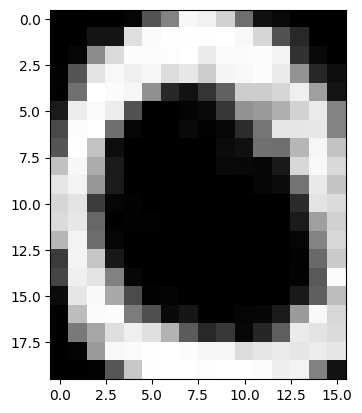

In [30]:
# Create the model
dbn_model = DBN(config=CONFIG)

# Train the model
dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=70, nb_epochs=300)

# Generate images from DBN
dbn_model.generer_image_DBN(nb_data=10, nb_gibbs=100)


Epoch0/300


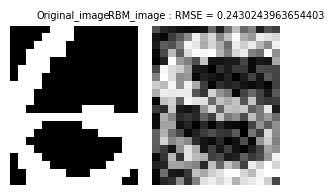

Epoch20/300


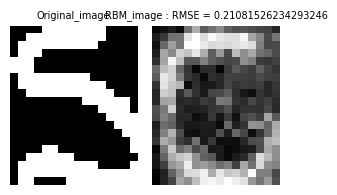

Epoch40/300


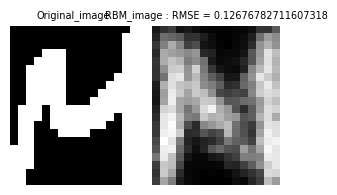

Epoch60/300


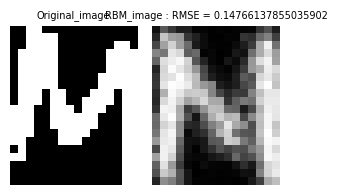

Epoch80/300


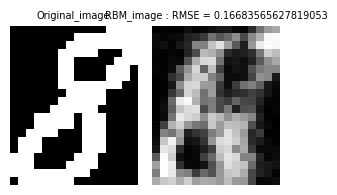

Epoch100/300


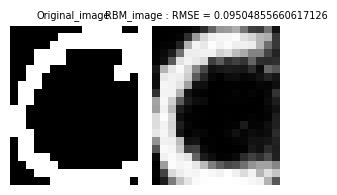

Epoch120/300


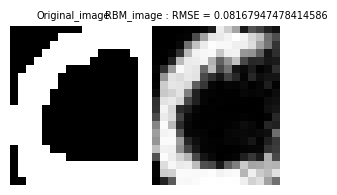

Epoch140/300


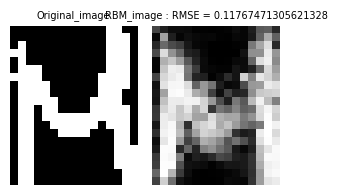

Epoch160/300


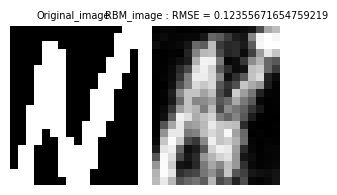

Epoch180/300


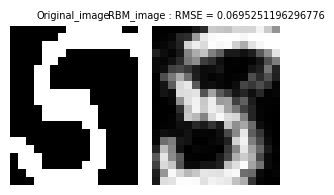

Epoch200/300


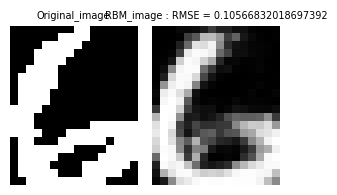

Epoch220/300


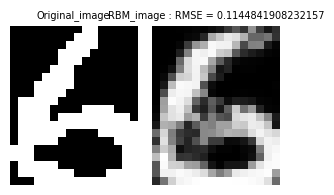

Epoch240/300


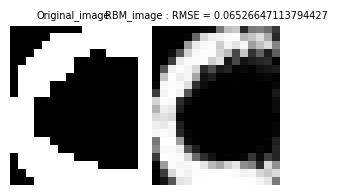

Epoch260/300


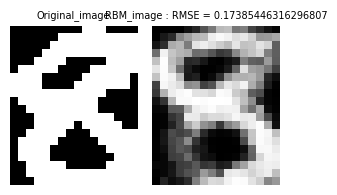

Epoch280/300


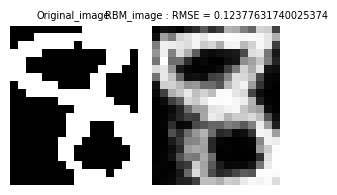

In [31]:
dbn_model.display_image_DBN_vs_original()

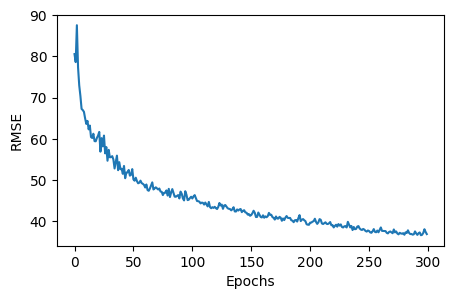

In [32]:
dbn_model = DBN(config=CONFIG)
errors_all = dbn_model.train_DBN(X=data, epsilon=0.1, batch_size=70, nb_epochs=300)
plt.figure(figsize=(5, 3))
plt.plot(errors_all)
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.show()